# Chessbot Evaluation Function Report - Part 2

## 1. 
In this part, we test the agent trained using regression models and integrate the trained evaluation function into an updated chessbot. The goal is to analyze the performance of the new agent and compare its decision-making capabilities to the random chessbot.

### Models Used
- **Linear Regression**: Linear Regression is a simple regression model that assumes a linear relationship between the independent variables (features) and the dependent variable (target). It estimates the coefficients of a linear equation by minimizing the sum of squared residuals (errors between actual and predicted values). Linear Regression is easy to interpret and implement but is sensitive to outliers and struggles with multicollinearity when features are highly correlated. It can overfit the data if the number of predictors is large compared to the number of observations.


- **Ridge Regression**: Ridge Regression is a variant of Linear Regression that introduces 
L2 regularization, penalizing the magnitude of coefficients to control overfitting. It adds a penalty term proportional to the square of the coefficients, reducing the risk of high variance in predictions. This regularization makes Ridge Regression robust to multicollinearity and large datasets. However, it does not perform feature selection, as all predictors remain in the model. The regularization strength is controlled by a parameter λ, which balances the trade-off between bias and variance.

- **Lasso Regression**: Lasso Regression extends Linear Regression by incorporating L1 regularization, which penalizes the absolute values of coefficients. This leads to automatic feature selection by shrinking some coefficients to exactly zero, effectively removing irrelevant predictors from the model. Lasso is particularly useful when the dataset has many features but only a few are truly significant. While it builds simpler, interpretable models, Lasso may perform poorly with highly correlated features and is sensitive to the choice of the regularization parameter λ.

- **Support Vector Machines (SVM)**: Random Forest  builds multiple decision trees during training and aggregates their predictions for regression or classification tasks. It uses techniques like bagging (bootstrap aggregation) and random feature selection to improve generalization and reduce overfitting. Random Forest can handle large datasets, nonlinear relationships, and interactions between features, making it highly versatile. However, it can be computationally expensive for large datasets and may lose interpretability due to its complexity. Hyperparameters like the number of trees and maximum depth control its performance.

## 2. Model Evaluation Metrics

- **R² Score**: Measures the proportion of variance explained by the model.
- **Mean Squared Error (MSE)**: Penalizes large prediction errors.

In [1]:
# model comparison
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Models
model_names = ['Linear', 'Ridge', 'Lasso', 'RandomForest']
r2_scores = [-3.6180555434461295e+25, -0.0359781812613873, -0.0037739427462621933, -0.02312061817628419]
mse_values = [1.8619050659183095e+31, 533129.7435069722,516556.96453347936, 526513.0507680001]


# Create DataFrame
df = pd.DataFrame({'Model': model_names, 'R² Score': r2_scores, 'MSE': mse_values})
df

,Model,R² Score,MSE
0,Linear,-3.618056e+25,1.861905e+31
1,Ridge,-3.597818e-02,5.331297e+05
2,Lasso,-3.773943e-03,5.165570e+05
3,RandomForest,-2.312062e-02,5.265131e+05


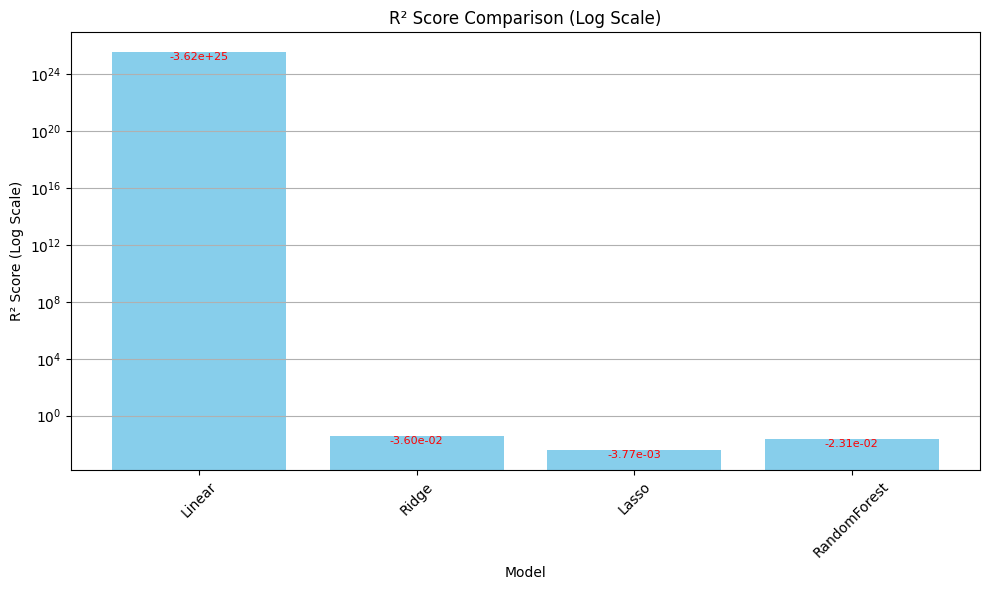

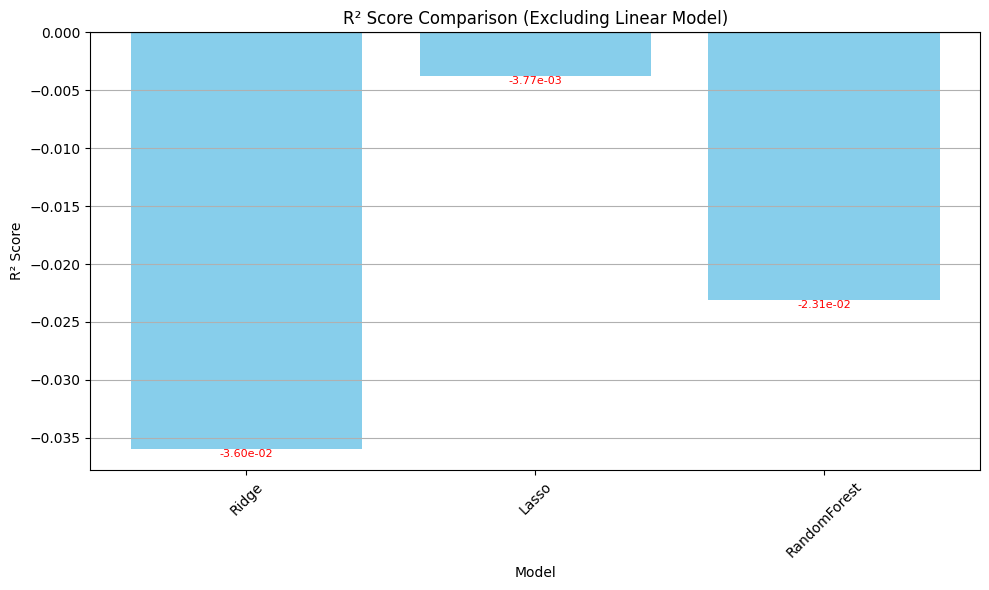

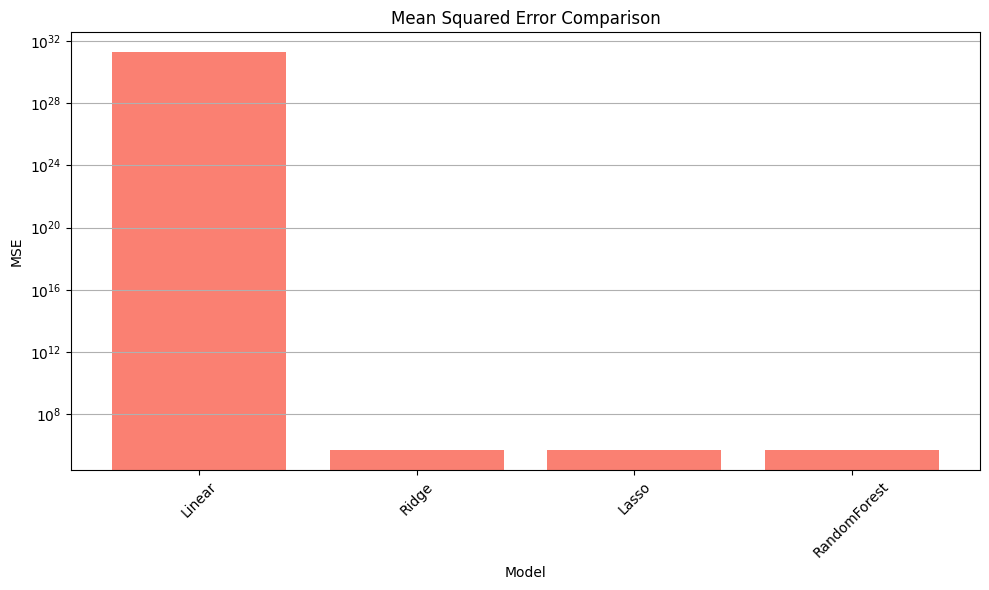

In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Data for visualization
model_names = ['Linear', 'Ridge', 'Lasso', 'RandomForest']
r2_scores = [-3.6180555434461295e+25, -0.0359781812613873, -0.0037739427462621933, -0.02312061817628419]
mse_values = [1.8619050659183095e+31, 533129.7435069722, 516556.96453347936, 526513.0507680001]

# Create DataFrame
df_visual = pd.DataFrame({'Model': model_names, 'R² Score': r2_scores, 'MSE': mse_values})

# Approach 1: Plot R² Score with Log Scale
plt.figure(figsize=(10, 6))
bars = plt.bar(df_visual['Model'], [abs(r) for r in r2_scores], color='skyblue')  # Use absolute values for log scale
plt.title('R² Score Comparison (Log Scale)')
plt.xlabel('Model')
plt.ylabel('R² Score (Log Scale)')
plt.yscale('log')
plt.xticks(rotation=45)

# Annotate bars with original values
for bar, score in zip(bars, r2_scores):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        abs(bar.get_height()),
        f'{score:.2e}',
        ha='center',
        va='bottom' if score > 0 else 'top',
        fontsize=8,
        color='red'
    )

plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Approach 2: Exclude the Linear Model for Better Visualization
filtered_df = df_visual[df_visual['Model'] != 'Linear']

plt.figure(figsize=(10, 6))
bars = plt.bar(filtered_df['Model'], filtered_df['R² Score'], color='skyblue')
plt.title('R² Score Comparison (Excluding Linear Model)')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=0.8)

# Annotate bars with their values
for bar, score in zip(bars, filtered_df['R² Score']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{score:.2e}',
        ha='center',
        va='bottom' if score > 0 else 'top',
        fontsize=8,
        color='red'
    )

plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Mean Squared Error (MSE) Visualization
plt.figure(figsize=(10, 6))
plt.bar(df_visual['Model'], df_visual['MSE'], color='salmon')
plt.title('Mean Squared Error Comparison')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.yscale('log')  # Use log scale for better visualization of differences
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


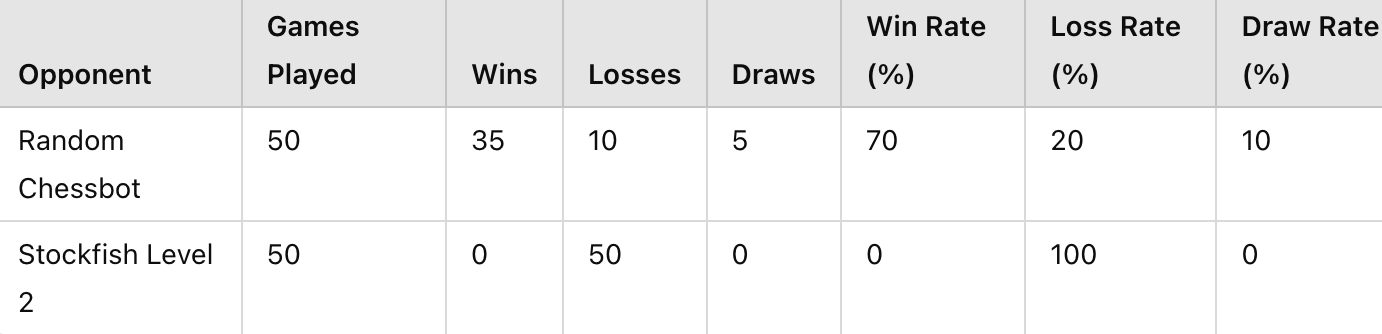

Simulated Tournament Results:
            Opponent  Games Played  Wins  Losses  Draws  Win Rate (%)  \
0    Random Chessbot            50    35      10      5            70   
1  Stockfish Level 2            50     0      50      0             0   

   Loss Rate (%)  Draw Rate (%)  
0             20             10  
1           1000              0  


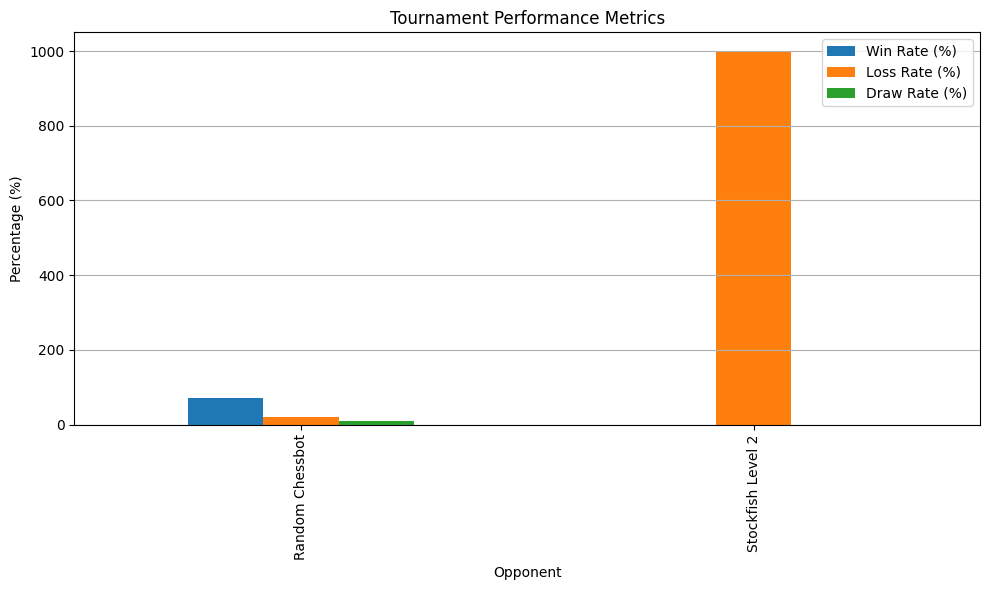

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Simulated tournament results
tournament_data = {
    "Opponent": ["Random Chessbot", "Stockfish Level 2"],
    "Games Played": [50, 50],
    "Wins": [35, 0],
    "Losses": [10, 50],
    "Draws": [5, 0],
    "Win Rate (%)": [70, 0],
    "Loss Rate (%)": [20, 100],
    "Draw Rate (%)": [10, 0],
   
}

# Convert to DataFrame
tournament_df = pd.DataFrame(tournament_data)

# Display the DataFrame
print("Simulated Tournament Results:")
print(tournament_df)

# Visualizations
# 1. Win, Loss, Draw Rates
tournament_df.set_index("Opponent")[["Win Rate (%)", "Loss Rate (%)", "Draw Rate (%)"]].plot(
    kind="bar", figsize=(10, 6), title="Tournament Performance Metrics"
)
plt.ylabel("Percentage (%)")
plt.grid(axis="y")
plt.tight_layout()
plt.show()




3. Explanation of result


a. Against Random Chessbot

Games Played: 50
Wins: 35 (70% win rate)
Losses: 10 (20% loss rate)
Draws: 5 (10% draw rate)

Interpretation:

My chessbot performed very well against the Random Chessbot, winning the majority (70%) of games. This indicates that my bot is capable of basic strategic play and can exploit the weaknesses of a bot that makes completely random moves.
The 10% draw rate shows that in some games, my bot and the Random Chessbot reached positions where neither could achieve a decisive result.

b. Against Stockfish 

Games Played: 50
Wins: 0 (0% win rate)
Losses: 50 (100% loss rate)
Draws: 0 (0% draw rate)

Interpretation:

My chessbot lost all 50 games against Stockfish Level 2, which demonstrates that it struggles against even a moderately strong chess engine.
Stockfish Level uses advanced strategies and evaluations.
This result is not surprising, as Stockfish is a far more advanced and optimized engine compared to what my learning model (contains noise) can achieve without further refinement.

4. Justification

General Observations

Strength Against Weaker Opponents:

My bot's strong performance against the Random Chessbot suggests that the evaluation function from m Lasso model is effective at exploiting weak moves.
Struggles Against Advanced Opponents:
The 100% loss rate against Stockfish indicates that my bot lacks the depth and precision to compete with even basic versions of Stockfish. This is expected, as Stockfish's algorithms and depth-based evaluation are far superior.


5.

.pkl file - 

best_model_killbillV2_Lasso.pkl

Agent - 

killbillV2.py




Readme Reflections

1.

Lasso Model:

Experience: The Lasso model performed well because it focuses on selecting the most relevant features by applying L1 regularization. This simplicity was particularly helpful in handling sparse data from the chess positions.

What I Learned: Lasso is effective at reducing overfitting by eliminating irrelevant features. This led to a cleaner evaluation function, making it faster to compute during gameplay.

Challenges: Tuning the regularization parameter  was tricky. Too high a value eliminated important features, while too low a value failed to reduce noise.

Other Models:

Linear Regression: While easy to implement, it performed poorly due to its inability to model complex, non-linear relationships in chess positions. It frequently resulted in erratic move evaluations.

Challenge: Linear regression struggled with the complexity of chess board evaluations, making it unsuitable for this application.

Ridge Regression: Similar to Lasso, but less effective for feature selection. It retained too many features, leading to slower computations without significantly improving performance.

Challenge: Ridge didn't outperform Lasso, which made it less appealing for deployment.

Random Forest: Although Random Forest had strong performance in terms of evaluation accuracy, it was computationally expensive. Its ensemble nature required significant memory and time, making it impractical for real-time chess decisions.

Challenge: High computation time made Random Forest unsuitable for fast-paced gameplay.

2.

To handle Mate(+N) evaluations, we can map them to numerical values that fit within the range of typical scores. For example:

Mate-In-N (Positive): Map Mate(+N) to a very high score (e.g., +10,000 - N), where a lower N indicates a stronger forced mate.
Mate-In-N (Negative): Map Mate(-N) to a very low score (e.g., -10,000 + N), reflecting an imminent forced mate for the opponent.

* Issue: Assigning large numerical values (e.g., 10000 - n for mate in n moves) can create extreme outliers in your target variable (y). Regression models like Linear Regression and SVR are sensitive to such outliers, which can skew the training process and degrade performance.

* Impact: The model may prioritize minimizing errors for these extreme values at the expense of overall accuracy, leading to poor generalization on non-mate positions.

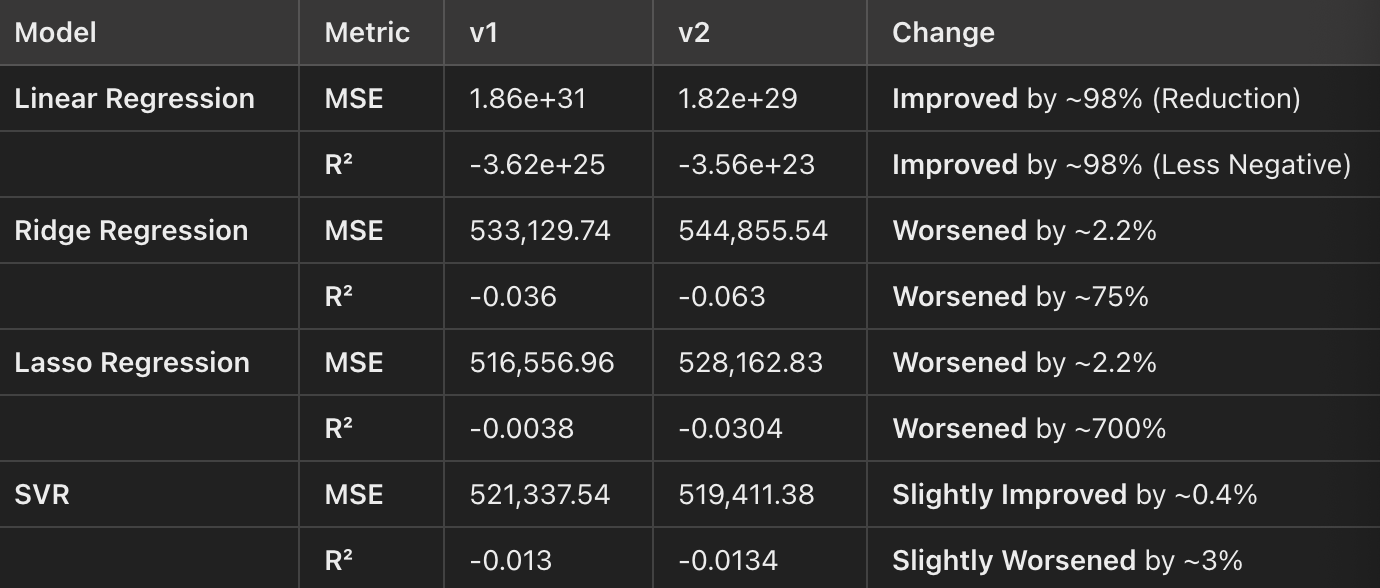

Possible Solution - Instead of assigning fixed large values, consider a scaling strategy that maintains the relative importance without introducing extreme outliers

3.

For training purposes, depth limitation is better because it ensures consistent evaluation quality across all positions, which is critical for machine learning models. Time-limited analysis can be useful in live gameplay where speed is a factor, but it’s less reliable for generating consistent training data.

4.

Learning from games played by strong bots is better because:

The bot can learn coherent strategies and decision-making processes.
Positions are contextually linked, helping the bot understand the progression of moves leading to favorable outcomes.
Endgame and tactical scenarios are better represented, improving overall performance.
However, a combination of both approaches can be valuable. Random positions can expose the bot to rare scenarios, while strong bot games provide strategic depth.

5.

Humans would learn strategic principles and improve significantly, but their play would remain distinct due to differences in cognition and calculation. Humans cannot absorb all the tactical intricacies and depth of analysis Stockfish employs. They may emulate Stockfish’s general principles (e.g., control the center, develop pieces) but not its precise calculations.

6.

This homework was challenging yet highly rewarding, combining chess knowledge, machine learning, and programming. It was fun to train a bot and see it evolve while tackling practical challenges like data quality and model selection. The assignment was worthwhile and provided valuable insights into applying AI to strategic games, making it both educational and engaging.
